# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Webscrapping is a process to collect unstructured data from the website on the Internet. In this project I will use BeautifulSoup package to extract the data which is imported from requirement.txt

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached numpy-1.21.5-cp39-cp39-win_amd64.whl (14.0 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached Pillow-9.0.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
 

To begin, I will request the link (URL) to get the data from the website

In [2]:
import requests

url_get = requests.get("https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31")

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
cont = soup.find_all('div', attrs={'class':'lister-item-content'})
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime();


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
table = soup.find("div", attrs={"class":"lister list detail sub-list"})
print(table.prettify()[500:5000])

EyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
    </a>
   </div>
   <div class="lister-item-content">
    <h3 class="lister-item-header">
     <span class="lister-item-index unbold text-primary">
      1.
     </span>
     <a href="/title/tt10366460/">
      CODA
     </a>
     <span class="lister-item-year text-muted unbold">
      (2021)
     </span>
    </h3>
    <p class="text-muted">
     <span class="certificate">
      17+
     </span>
     <span class="ghost">
      |
     </span>
     <span class="runtime">
      111 min
     </span>
     <span class="ghost">
      |
     </span>
     <span class="genre">
      Comedy, Drama, Music
     </span>
    </p>
    <div class="ratings-bar">
     <div class="inline-block ratings-imdb-rating" data-value="8" name="ir">
      <span class="global-sprite rating-star imdb-rating">
      </span>
      <strong>
       8.0
      </strong>
     </div>
    

Finding row length.

In [7]:
table.find_all("div", attrs={"class":"lister-item mode-advanced"})[:5]

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt10366460"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt10366460/"> <img alt="CODA" class="loadlate" data-tconst="tt10366460" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzkyNzNiMDItMGU1Yy00NmEyLWE4N2ItMjkzMDZmMmVhNDU4XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt10366460/">CODA</a>
 <span class="lister-item-year text-muted unbold">(2021)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">17+</span>
 <span class="ghost">|</span>
 <span class="runtime">111 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Comedy, Drama, Mus

In [8]:
imdb = table.find_all("h3", attrs={"class":"lister-item-header"})
row_length = len(imdb)
row_length

50

## Scrapping Process

### Inspecting Element
    a. Go to IMDB Website
    b. Right Click 
    c. Inspect-Element
    d. copy the code element

### Four information required
    1. Judul, in h3 , class lister-item-header
    2. imdb_rating, in div, class inline-block ratings-imdb-rating
    3. metascore, in span, class:metascore favorable
    4. voting, in span, name:nv

### Looping 
    1. I will make a placeholder name 'temp'
    2. making a loop function 
    3. extract the four information
    4. append the data on temp.append
    5. call the temp



In [26]:
temp = [] #initiating a tuple
for i in range(0, len(cont)):
    #Untuk mendapat judul
    judul = cont[i].find('h3',attrs={'class':'lister-item-header'})
    judul = judul.find('a').text
    
    #Untuk mendapat rating
    rating = cont[i].find('div', attrs={'class':'inline-block ratings-imdb-rating'})
    rating = rating.find('strong', attrs={'':''}).text

    #Untuk mendapat Meta
    favorable = cont[i].find('span', attrs={"class": "metascore favorable"})
    mixed = cont[i].find('span', attrs={"class": "metascore mixed"})
     # kondisi ketika keduanya None
    if (favorable == None) and (mixed == None):
     meta = 0
    # kondisi ketika favorable None
    elif (favorable == None):
        meta = mixed.text.strip()
    # kondisi ketika mixed None
    elif (mixed == None):
        meta = favorable.text.strip()

    #Untuk mendapat votes    
    votes = cont[i].find('p', attrs={'class':'sort-num_votes-visible'}).text
    votes = votes.replace("\n","")
    votes = votes.replace("Votes:","")
    votes = votes.replace("| Gross:$858.37M","")
    votes = votes.replace("| Gross:$53.80M","")
    votes = votes.replace("| Gross:$164.87M","")
    votes = votes.replace("| Gross:$121.63M","")
    votes = votes.replace("| Gross:$160.87M","")
    votes = votes.replace("| Gross:$224.54M","")
    votes = votes.replace(",",".")
        
    
    temp.append((judul,rating,meta,votes))
 
temp
    

[('CODA', '8.0', '74', '98.143'),
 ('Spider-Man: No Way Home', '8.4', '71', '592.143'),
 ('Dune: Part One', '8.1', '74', '546.452'),
 ('The Power of the Dog', '6.9', '89', '153.664'),
 ('Nightmare Alley', '7.1', '70', '111.785'),
 ('1883', '8.9', 0, '48.281'),
 ('Encanto', '7.3', '75', '185.899'),
 ('Sing 2', '7.5', '49', '44.603'),
 ('West Side Story', '7.3', '85', '67.194'),
 ('King Richard', '7.5', '76', '85.166'),
 ('The Outlaws', '7.7', 0, '6.651'),
 ('Licorice Pizza', '7.3', '90', '75.191'),
 ("The King's Man", '6.3', '44', '113.899'),
 ('Eternals', '6.4', '52', '290.336'),
 ('Verdens verste menneske', '7.9', '90', '37.740'),
 ('Belfast', '7.3', '75', '54.922'),
 ('The Eyes of Tammy Faye', '6.6', '55', '25.075'),
 ("Don't Look Up", '7.2', '49', '488.005'),
 ('Free Guy', '7.2', '62', '328.136'),
 ('House of Gucci', '6.6', '59', '98.390'),
 ('Gekijouban Jujutsu Kaisen 0', '8.0', '72', '6.317'),
 ('Doraibu mai kâ', '7.6', '91', '35.480'),
 ('The Book of Boba Fett', '7.4', 0, '111.77

## Creating data frame & Data wrangling

After scrapping, The data need to be put into DataFrame with N/A will be transformed into NaN for visualization purposes, and some data types will be changed to make it easier.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sb

df = pd.DataFrame(temp, columns = ('Judul','rating','meta','votes'))
df = df.set_index('Judul')
df.head()

,rating,meta,votes
Judul,,,
CODA,8.0,74,98.143
Spider-Man: No Way Home,8.4,71,592.143
Dune: Part One,8.1,74,546.452
The Power of the Dog,6.9,89,153.664
Nightmare Alley,7.1,70,111.785


In [28]:
df['votes'] = df['votes'].str.replace(",","")
df['votes'] = df['votes'].astype('float64')
df[['rating','meta']] = df[['rating','meta']].astype('float64')
df.dtypes

rating    float64
meta      float64
votes     float64
dtype: object

## Data visualisation 
after cleaning, I will make some visualization to make it understandable

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

### Seven Highest Rating

<AxesSubplot:title={'center':'Seven Highest Rating'}, ylabel='imdb_rating'>

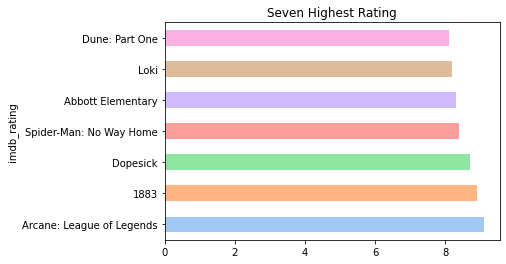

In [30]:
colors = sb.color_palette('pastel')
viz_rate = df['rating'].sort_values(ascending=False).head(7)
viz_rate.plot.barh(color=colors[:7], title= 'Seven Highest Rating', xlabel= 'imdb_rating', ylabel = 'Judul', rot=0)

<AxesSubplot:title={'center':'Seven Highest MetaScore'}, ylabel='imdb_metascore'>

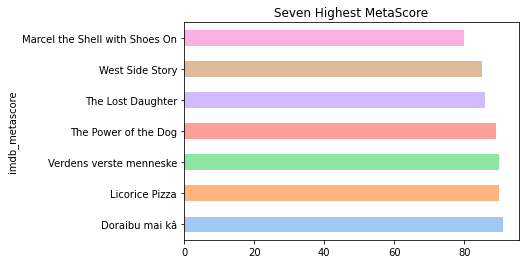

In [31]:
colors1 = sb.color_palette('pastel')
viz_meta = df['meta'].sort_values(ascending=False).head(7)
viz_meta.plot.barh(color=colors1[:7], title= 'Seven Highest MetaScore', xlabel= 'imdb_metascore', ylabel = 'Judul', rot=0)

### Correlation between Rating and MetaScore

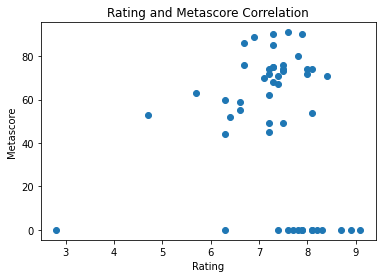

In [15]:
a = df['rating']
b = df['meta']

plt.title("Rating and Metascore Correlation")
plt.xlabel("Rating")
plt.ylabel("Metascore")

plt.scatter(a,b)
plt.show()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

In [16]:
pip-list --format=freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\LENOVO\anaconda3\envs\cpst_web\python.exe -m pip <command> [options]

no such option: -l


## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Seven Highest Rating'}, ylabel='imdb_rating'>

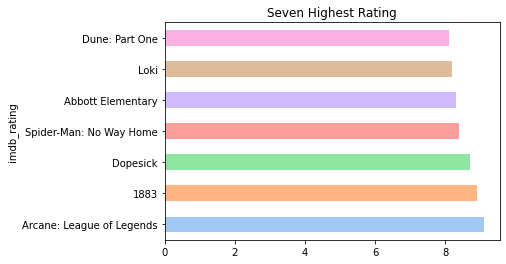

In [17]:
colors = sb.color_palette('pastel')
viz_rate = df['rating'].sort_values(ascending=False).head(7)
viz_rate.plot.barh(color=colors[:7], title= 'Seven Highest Rating', xlabel= 'imdb_rating', ylabel = 'Judul', rot=0)

As we can see from the bar graph, It is clear that "Being the Ricardos" was the highest rating from 2021 film for approximately 7. The rest followed with slight differences.

<AxesSubplot:title={'center':'Seven Highest MetaScore'}, ylabel='imdb_metascore'>

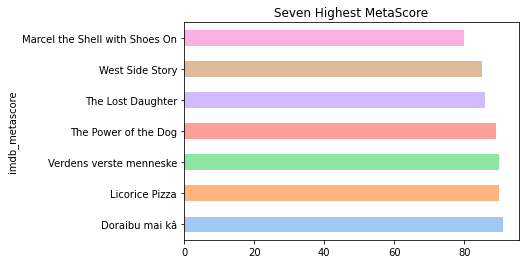

In [18]:
colors1 = sb.color_palette('pastel')
viz_meta = df['meta'].sort_values(ascending=False).head(7)
viz_meta.plot.barh(color=colors1[:7], title= 'Seven Highest MetaScore', xlabel= 'imdb_metascore', ylabel = 'Judul', rot=0)

Besides, from the highest MetaScore, the rank is totally different from the one we get from rating which is "The Eyes of Tammy Faye" outperformed its counterparts. Furthermore, "The King's Man" is the only movie that was in the top list of the movie

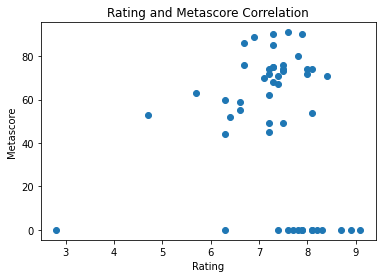

In [19]:
a = df['rating']
b = df['meta']

plt.title("Rating and Metascore Correlation")
plt.xlabel("Rating")
plt.ylabel("Metascore")

plt.scatter(a,b)
plt.show()

Seing this phenomenon, I tried to look at the correlation between this two variables,but seems that the data is distributed to all area.
for this I tried to find out the correlation. The results was that, there are only small correlation between Rating and MetaScore.

In [20]:
(a).corr(b)

-0.1305183642139673

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.